<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# Keras Syntax Basics

With TensorFlow 2.0 , Keras is now the main API choice. Let's work through a simple regression project to understand the basics of the Keras syntax and adding layers.

## The Data

To learn the basic syntax of Keras, we will use a very simple fake data set, in the subsequent lectures we will focus on real datasets, along with feature engineering! For now, let's focus on the syntax of TensorFlow 2.0.

Let's pretend this data are measurements of some rare gem stones, with 2 measurement features and a sale price. Our final goal would be to try to predict the sale price of a new gem stone we just mined from the ground, in order to try to set a fair price in the market.

### Load the Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('fake_reg.csv')

In [ ]:
df.head()
#fake regression dataset with price and 2 features, use features to predict price

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


### Explore the data

Let's take a quick look, we should see strong correlation between the features and the "price" of this made up product.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

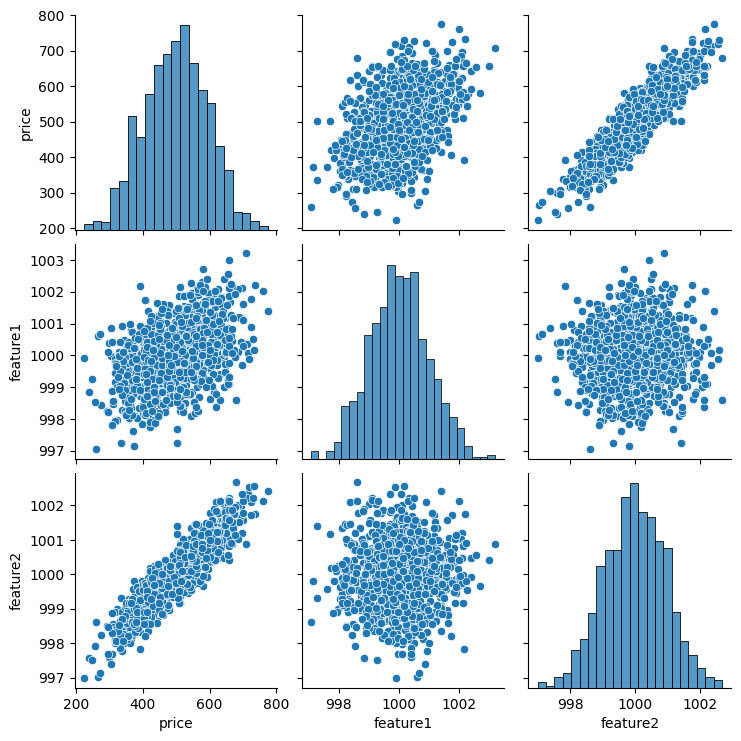

In [ ]:
sns.pairplot(df)
#creating a simple pair plot of the features, fake dataset as feature2 has high corr with price
#data exploration and visualisations, explore the dataset, try to predict new features from existing features

Feel free to visualize more, but this data is fake, so we will focus on feature engineering and exploratory data analysis later on in the course in much more detail!

### Test/Train Split

In [ ]:
#split data into training and test dataset, evaluate model performance with test set
from sklearn.model_selection import train_test_split

In [ ]:
# Convert Pandas to Numpy for Keras

# Features, create numpy array of both features, feature matrix is usually 2D, .values returns data frame as an array
X = df[['feature1', 'feature2']].values

# Label, predict label of price
y = df['price'].values

#look at X and y, y is lowercase

# Split the dataset into training and test data
#test_size - & of your dataset used for testing, usually at 30% or 0.3
#split is performed randomly, randomly grabs rows and splits them into test and train sets
#random state is just a number, like seed, arbitrary, choose same number to always get data split in the same way
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
X_train.shape
#check your dataset for if split occured properly

(700, 2)

In [ ]:
X_test.shape

(300, 2)

In [ ]:
y_train.shape

(700,)

In [ ]:
y_test.shape

(300,)

## Normalizing/Scaling the Data

We scale the feature data.

[Why we don't need to scale the label](https://stats.stackexchange.com/questions/111467/is-it-necessary-to-scale-the-target-value-in-addition-to-scaling-features-for-re)

In [ ]:
#scale feature data to generate weights and biases, 1000 rows in data 300 is 30%
#can take lower % if dataset is larger
#normalise and scale your features data to avoid vanishing or exploding gradients
#many ways to normalise and scale your data, using MinMaxScaler here
from sklearn.preprocessing import MinMaxScaler

In [ ]:
help(MinMaxScaler)
#guide of what the scaler does, transforms your data according to stdev
#only scale the feature data, do not scale the label, link above
#label is used only for the final comparison, feature data is what is passed through the model

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : bo

In [ ]:
#save scalar into a variable
scaler = MinMaxScaler()

In [ ]:
# Notice to prevent data leakage from the test set, we only fit our scaler to the training set
#depends on stdev, min and max values of the dataset used
#only fit scaler on training data to get parameters above, avoid leakage onto the test dataset

In [ ]:
#fit scaler onto the data, calculates parameters required for scaling of data later on
scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
#transform now data

In [ ]:
#check data after transformation
X_train

array([[0.74046017, 0.32583248],
       [0.43166001, 0.2555088 ],
       [0.18468554, 0.70500664],
       ...,
       [0.54913363, 0.79933822],
       [0.2834197 , 0.38818708],
       [0.56282703, 0.42371827]])

In [ ]:
X_test

array([[ 0.39533339,  0.38540671],
       [ 0.57300502,  0.74070924],
       [ 0.61294076,  0.65734264],
       [ 0.38169528,  0.73076311],
       [ 0.07776591,  0.46323644],
       [ 0.49421971,  0.68949258],
       [ 0.2065742 ,  0.70096247],
       [ 0.55141988,  0.41776773],
       [ 0.36812191,  0.69082394],
       [ 0.56465724,  0.3877465 ],
       [ 0.57048029,  0.71810824],
       [ 0.79569525,  0.47979901],
       [ 0.38488235,  0.41856516],
       [ 0.33142545,  0.42411972],
       [ 0.89361377,  0.63912775],
       [ 0.50191166,  0.39789174],
       [ 0.7159808 ,  0.43688384],
       [ 0.35812192,  0.92028225],
       [ 0.49989367,  0.85589311],
       [ 0.63965434,  0.59024789],
       [ 0.19053626,  0.34203634],
       [ 0.40982896,  0.45849208],
       [ 0.26844791,  0.40167269],
       [ 0.38649709,  0.33592759],
       [ 0.50654703,  0.65789843],
       [ 0.41260556,  0.79338075],
       [ 0.45631316,  0.61323307],
       [ 0.44064792,  0.40889315],
       [ 0.42963904,

In [ ]:
#max and min should be now 0 and 1 for training dataset
X_train.max()
X_train.min()

#scaled everything 0-1 next part is creating neural network

0.0

# TensorFlow 2.0 Syntax


## Import Options

There are several ways you can import Keras from Tensorflow (this is hugely a personal style choice, please use any import methods you prefer). We will use the method shown in the **official TF documentation**.

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential
#import models and keras API, check documentation
from tensorflow.keras.layers import Dense

In [ ]:
#help(Sequential)
#nice documentation, various examples, how to construct model and add layers to it, also check Dense
#2 ways of creating keras model
#sequential and pass [] list of layers you want to use
#dense is regular densely connected neural network layer, normal feed-forward network, all neurons are connected 
#2 parameters inside, units - number of neeurons, activation - what activation function neurons neeed to be using

## Creating a Model

There are two ways to create models through the TF 2 Keras API, either pass in a list of layers all at once, or add them one by one.

Let's show both methods (its up to you to choose which method you prefer).

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

### Model - as a list of layers

In [ ]:
model = Sequential([
    Dense(units=2),
    Dense(units=2),
    Dense(units=2)
])

### Model - adding in layers one by one

In [ ]:
model = Sequential()

model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))

Let's go ahead and build a simple model and then compile it by defining our solver

In [ ]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

# Final output node for prediction of label, output layer depends on your situation and what you are trying to predict
#single predicted price value, predict one price so 1 neuron, dense 1
#measure predicted price vs true price
model.add(Dense(1))

#compile your model
#2 parameters, optimizer - how to perform gradient descent, also Adam optimizer, check documentation
#loss function - what you are actually trying to accomplish
#classification - multiclass - categorical crossentropy
#for binary use binary crossentropy
#regression problem, continuous use mean squared error, mean sq error of prediction - true label
model.compile(optimizer='rmsprop', loss='mse')

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

# Training

Below are some common definitions that are necessary to know and understand to correctly utilize Keras:

* Sample: one element of a dataset.
    * Example: one image is a sample in a convolutional network
    * Example: one audio file is a sample for a speech recognition model
* Batch: a set of N samples. The samples in a batch are processed independently, in parallel. If training, a batch results in only one update to the model.A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation; however, it is also true that the batch will take longer to process and will still result in only one update. For inference (evaluate/predict), it is recommended to pick a batch size that is as large as you can afford without going out of memory (since larger batches will usually result in faster evaluation/prediction).
* Epoch: an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation.
* When using validation_data or validation_split with the fit method of Keras models, evaluation will be run at the end of every epoch.
* Within Keras, there is the ability to add callbacks specifically designed to be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).

In [ ]:
#model is complete and ready to train, fit onto the data, shift tab, parameters
#main parameters, x, y and epochs
#x - our features training on, x_train
#y - actual labels that will correspond, y_train
#epochs - 1 epoch - going through the model once, 1 pass over entire dataset through the model
#go through the model 250 times, 250 epochs
model.fit(X_train, y_train, epochs=250)

Epoch 1/250
22/22 [==============================] - 1s 2ms/step - loss: 256403.4062
Epoch 2/250
22/22 [==============================] - 0s 2ms/step - loss: 256210.4844
Epoch 3/250
22/22 [==============================] - 0s 2ms/step - loss: 256010.2188
Epoch 4/250
22/22 [==============================] - 0s 2ms/step - loss: 255785.7656
Epoch 5/250
22/22 [==============================] - 0s 2ms/step - loss: 255534.8125
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 255256.8281
Epoch 7/250
22/22 [==============================] - 0s 2ms/step - loss: 254946.2188
Epoch 8/250
22/22 [==============================] - 0s 2ms/step - loss: 254606.4531
Epoch 9/250
22/22 [==============================] - 0s 2ms/step - loss: 254232.2031
Epoch 10/250
22/22 [==============================] - 0s 2ms/step - loss: 253821.0000
Epoch 11/250
22/22 [==============================] - 0s 2ms/step - loss: 253367.7188
Epoch 12/250
22/22 [==============================] - 0s 3ms/st

Later on, you can add stopping point, model will stop at particular time that is optimized based on some validation loss. With** callback parameter**
Verbose call, verbose=1, number of outputs during training.
As model keeps training prints outputs, higher verbose number, more info printed. If verbose=0, no output, always set verbose > 0 to see where you are training. Otherwise it just runs. Small dataset, finished training quickly. 
Mse is large very early, as ws and bs are adjusted, loss is slowly decreasing, decreases fast at first and then later on decreases slowly, adjusts to some mse value.

## Evaluation

Let's evaluate our performance on our training set and our test set. We can compare these two performances to check for overfitting.

In [ ]:
model.history.history
#returns dictionary of historical losses

{'loss': [256403.40625,
  256210.484375,
  256010.21875,
  255785.765625,
  255534.8125,
  255256.828125,
  254946.21875,
  254606.453125,
  254232.203125,
  253821.0,
  253367.71875,
  252868.34375,
  252319.859375,
  251726.40625,
  251077.984375,
  250370.28125,
  249602.75,
  248773.9375,
  247877.765625,
  246917.78125,
  245881.671875,
  244763.640625,
  243548.140625,
  242239.0625,
  240836.84375,
  239330.40625,
  237706.78125,
  235990.40625,
  234144.984375,
  232182.96875,
  230091.21875,
  227884.734375,
  225547.171875,
  223061.6875,
  220426.5625,
  217663.640625,
  214742.921875,
  211678.859375,
  208454.15625,
  205078.40625,
  201538.375,
  197855.546875,
  194011.171875,
  190020.0,
  185838.953125,
  181487.53125,
  177005.390625,
  172363.625,
  167553.78125,
  162582.703125,
  157484.546875,
  152239.890625,
  146848.609375,
  141293.421875,
  135618.34375,
  129856.9453125,
  123983.0859375,
  117984.15625,
  111915.1640625,
  105783.53125,
  99586.671875,
  93

In [ ]:
#pass onto dataframe
loss_df = pd.DataFrame(model.history.history)

<Axes: >

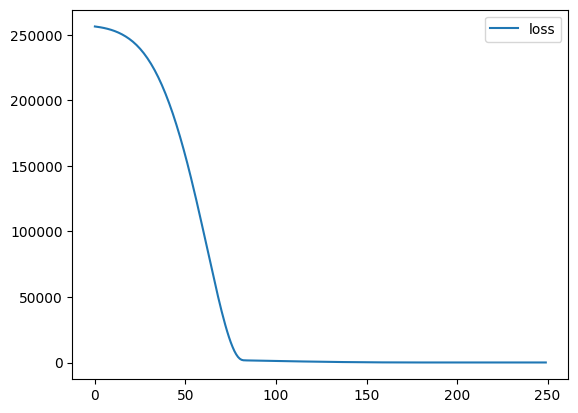

In [ ]:
#plot history of loss values
loss_df.plot()

Typical of neural networks, start with high loss. As weights and biases are adjusted, loss over time reduces until it reaches plateau over certain number of epochs. Step decline in loss, eventually levels off, no further improvement with more training. Compare with validation loss to check for overfitting.

In [ ]:
#compare performance of the model, true value vs predicted output, then evaluate how well model performs on never seen before data

In [ ]:
loss = model.history.history['loss']

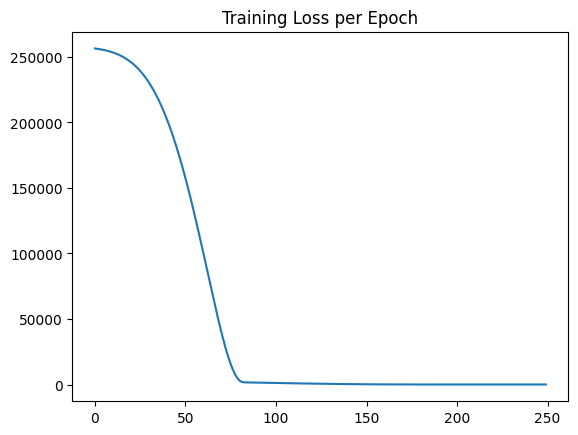

In [ ]:
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

### Compare final evaluation (MSE) on training set and test set.

These should hopefully be fairly close to each other.

In [ ]:
model.metrics_names

['loss']

In [ ]:
#evaluate performance, always returns some value of mse
#verbose=0 so no output

training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [ ]:
model.evaluate(X_test, y_test, verbose=0)
#chosen metric of mse, gives back mse of 29, do the same for training set
model.evaluate(X_train, y_train, verbose=0)
#values may look slightly different, random initialisations, after training 250 epochs should be 

ValueError: ignored

In [ ]:
training_score

24.315702438354492

In [ ]:
test_score

26.426509857177734

### Further Evaluations

In [ ]:
#get mean absolute error and root squared error
test_predictions = model.predict(X_test)
#pass in test features and predict what price should be, list of prices predicted below

10/10 [==============================] - 0s 3ms/step


In [ ]:
test_predictions

array([[406.1444 ],
       [624.9068 ],
       [593.427  ],
       [573.4689 ],
       [367.37277],
       [580.4413 ],
       [516.1577 ],
       [460.09177],
       [550.43414],
       [448.47736],
       [613.12573],
       [550.1455 ],
       [419.98648],
       [409.73114],
       [652.6822 ],
       [438.2314 ],
       [509.5557 ],
       [661.37787],
       [664.0398 ],
       [566.7717 ],
       [334.9116 ],
       [445.78107],
       [383.32492],
       [379.54782],
       [567.82837],
       [611.9253 ],
       [533.543  ],
       [428.76886],
       [656.8821 ],
       [414.96002],
       [443.58176],
       [486.17044],
       [439.34766],
       [683.3493 ],
       [425.66348],
       [418.567  ],
       [503.01755],
       [551.672  ],
       [510.82782],
       [396.1815 ],
       [619.94885],
       [417.51218],
       [605.77356],
       [446.91586],
       [503.07108],
       [582.99365],
       [670.4816 ],
       [491.4608 ],
       [319.2338 ],
       [486.4698 ],


In [ ]:
#now compare against true labels with y_test, create dataframe
#reshape so dimensions of predicted vs true are the same
test_predictions = pd.Series(test_predictions.reshape(300,))
pred_df = pd.DataFrame(y_test,columns=['Test True Y'])

In [ ]:
pred_df

,Test True Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [ ]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [ ]:
test_predictions

0      406.872131
1      625.850891
2      594.339111
3      574.364014
4      368.065674
          ...    
295    531.038879
296    517.299805
297    611.917053
298    418.578339
299    412.475281
Length: 300, dtype: float32

In [ ]:
#join now predicted and true label, axis=1 so columnwise
pred_df = pd.concat([pred_df, test_predictions],axis=1)

In [ ]:
#rename columns
pred_df.columns = ['Test True Y', 'Model Predictions']

In [ ]:
pred_df

,Test True Y,Model Predictions
0,402.296319,406.144409
1,624.156198,624.906799
2,582.455066,593.427002
3,578.588606,573.468872
4,371.224104,367.372772
...,...,...
295,525.704657,530.186890
296,502.909473,516.432129
297,612.727910,610.987122
298,417.569725,417.840698


<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

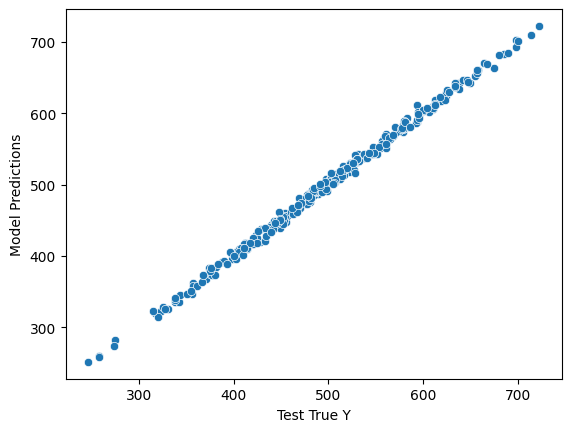

In [ ]:
#compare and visualise values of predicted vs true, very close in value!
sns.scatterplot(x='Test True Y', y = 'Model Predictions', data=pred_df)
#if perfect match, see train fitting line, model is performing very well

Let's compare to the real test labels!

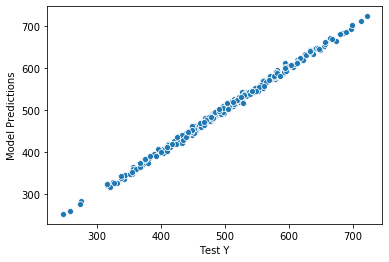

In [ ]:
sns.scatterplot(x='Test Y',y='Model Predictions',data=pred_df)

Can also compare using metrics, and other stat methods such as regression evaluation, mean absolute error, mean squared error and root squared error. 


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
#from mean squared error compare y true vs predicted
mean_absolute_error(pred_df['Test True Y'], pred_df['Model Predictions'])
#get value of ~ 4, so on average you are about 4$ off from true value

4.164810318360706

In [ ]:
#depends on context if your mse value is true or not
#look back at original data, look at mean price, $500, difference is <1%, good prediction
#always check context when judging mse, check distribution and mean of your data
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [ ]:
#now calculate mean squared error, same value as before, original loss of model was mse
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])

26.426512607250842

In [ ]:
#get root squared error, raised to the power of 0.5
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])**0.5

5.140672388632721

In [ ]:
pred_df['Error'] = pred_df['Test  True Y'] - pred_df['Model Predictions']

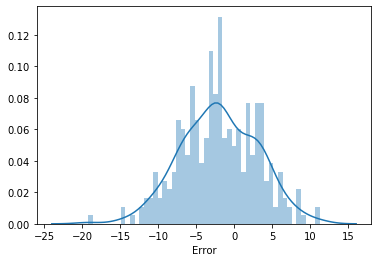

In [ ]:
sns.distplot(pred_df['Error'],bins=50)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
mean_absolute_error(pred_df['Test Y'],pred_df['Model Predictions'])

4.386681017104325

In [ ]:
mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions'])

29.11279458500883

In [ ]:
# Essentially the same thing, difference just due to precision
test_score

29.112792053222655

In [ ]:
#RMSE
test_score**0.5

5.3956271232566335

# Predicting on brand new data

What if we just saw a brand new gemstone from the ground? What should we price it at? This is the **exact** same procedure as predicting on a new test data!

In [ ]:
# [[Feature1, Feature2]]
#new data never seen before, predict its price using the model, use [[]] to match with original data
new_gem = [[998, 1000]]

In [ ]:
# Don't forget to scale! remember that you used scalar to transform the initial data so transform your new datapoint as well
scaler.transform(new_gem)

array([[0.14117652, 0.53968792]])

In [ ]:
new_gem = scaler.transform(new_gem)

In [ ]:
#predict price of new gem, should be aroundd $420, same process as with test dataset
model.predict(new_gem)

1/1 [==============================] - 0s 22ms/step


array([[420.56802]], dtype=float32)

## Saving and Loading a Model

In [ ]:
#save your model, especially useful if you have complex model
from tensorflow.keras.models import load_model

In [ ]:
model.save('my_gem_model.h5')  # creates a HDF5 file 'my_model.h5'

In [ ]:
#load your model using the same keras library
#for example if you are building model on already pre-existing model
later_model = load_model('my_gem_model.h5')

In [ ]:
#again to test if it works predict on new gem data
later_model.predict(new_gem)

1/1 [==============================] - 0s 64ms/step


array([[420.56802]], dtype=float32)